th[0] Fundos
th[1] Setor
th[2] Preço Atual
th[3] Liquidez Diária
th[4] P/VP
th[6] Dividend Yield
th[17] Patrimônio Líquido
th[24] Quant. Ativos
th[25] Volatilidade
th[26] Num. Cotistas

In [25]:
#Importação das bibliotecas
import requests 
import json
import pandas as pd
from bs4 import BeautifulSoup as bs
from datetime import datetime, timedelta
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from scipy.stats import ttest_ind

In [26]:
#Construção do header - Fonte:https://www.youtube.com/watch?v=o7CYPXmnUMs
headers = {
    "accept": "application/json, text/plain, */*",
    "accept-encoding": "gzip, deflate, br, zstd",
    "accept-language": "pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7",
    "cookie": "suno_checkout_userid=ad336406-522a-42e8-ac91-349945b25c8a; _gcl_au=1.1.2079664177.1741828992; __gtm_referrer=https%3A%2F%2Fwww.google.com%2F; _clck=1ot281v%7C2%7Cfu6%7C0%7C1898; _hjSession_1183503=eyJpZCI6IjE4YjkxMmFjLTIxNGItNGZlNC05NGFlLTE5YmMwODZmNzA5MiIsImMiOjE3NDE4Mjg5OTMyNDcsInMiOjAsInIiOjAsInNiIjowLCJzciI6MCwic2UiOjAsImZzIjoxLCJzcCI6MH0=; _ga=GA1.1.630256352.1741828993; FPAU=1.1.2079664177.1741828992; __hstc=173632188.cd3633df4a95797d9d484304826184c0.1741828994294.1741828994294.1741828994294.1; hubspotutk=cd3633df4a95797d9d484304826184c0; __hssrc=1; hotid=eyJjaWQiOiIxNzMyNjQ5NzkxODA0MzY3MDk3MTk2ODE4MzQ3ODQwIiwiYmlkIjoiMTczMjY0OTc5MTgwNDM2NzA5NzE5NjgxODM0Nzg0MCIsInNpZCI6ImVmNTZlNzQ0MTRkYTQ5NDRiOTI3Y2I3NmZjNGEzZjRkIn0=; wisepops_visits=%5B%222025-03-13T01%3A23%3A12.327Z%22%5D; _fbp=fb.2.1741828995015.675119474247774340; messagesUtk=cb068ce4c95944d28cd71ef425d1f3ae; hs-messages-hide-welcome-message=true; FPGSID=1.1741828994.1741829763.G-VN673HEDSJ.cBnUWwf23EDte3Fu41fcVQ; cf_clearance=ovlcDHQmQQwMnCO6MYDq9tfCCCtro5PlVNXDTo5rrVM-1741829764-1.2.1.1-JHdUrEIU2rbFSDmk00ws4TyYnX0TulgvETPCyo1.wJd5Mn2YbJfIO2M6CKzbCvc_UGKblzViUaamovWVUkweH28HmjAVDFGLAgb3zsa2Fq..5l1V7BtkuGy838swD4JcySezQ_uXw7I7EHeJa6B3hL5XjvfrQap9WfeHp45S.LVyB5D7efwVNtvRNLXJu0YCXNf_uwEPsjNJ2A0UrV2_q3jFsF7Cbk72eTFPeOZ.Uq6Rox3afoauE31KJG2bcFbZZVCVkSQA7Nd3ieYh4Lbwudnd32kIPrWsWJsltSscHCcpZbvTJ2UU5hgH.KrLA3n9aYntEGGlVIIgSHFJeAcPQUmwOe6oy4xvkafcQeS2Ar4; _hjSessionUser_1183503=eyJpZCI6IjEyOTFhYmNjLTk3ZmEtNTVkNy1hMmY2LWNlYmJlODI1ZThkNSIsImNyZWF0ZWQiOjE3NDE4Mjg5OTMyNDYsImV4aXN0aW5nIjp0cnVlfQ==; wisepops=%7B%22popups%22%3A%7B%7D%2C%22sub%22%3A0%2C%22ucrn%22%3A2%2C%22cid%22%3A%2252100%22%2C%22v%22%3A5%2C%22bandit%22%3A%7B%22recos%22%3A%7B%7D%7D%7D; _clsk=1w19r3t%7C1741829776510%7C4%7C1%7Cf.clarity.ms%2Fcollect; __hssc=173632188.3.1741828994294; wisepops_visitor=%7B%22Uiy2Q6Vhk4%22%3A%22079c853a-e2a4-4608-8104-1a4d7d24a124%22%7D; wisepops_session=%7B%22arrivalOnSite%22%3A%222025-03-13T01%3A23%3A12.327Z%22%2C%22mtime%22%3A1741829776740%2C%22pageviews%22%3A3%2C%22popups%22%3A%7B%7D%2C%22bars%22%3A%7B%7D%2C%22embeds%22%3A%7B%7D%2C%22sticky%22%3A%7B%7D%2C%22countdowns%22%3A%7B%7D%2C%22src%22%3A%22https%3A%2F%2Fwww.google.com%2F%22%2C%22utm%22%3A%7B%7D%2C%22testIp%22%3Anull%7D; _ga_VN673HEDSJ=GS1.1.1741828993.1.1.1741829790.0.0.1432253131",
    "priority": "u=1, i",
    "referer": "https://www.fundsexplorer.com.br/ranking",
    "sec-ch-ua": '"Chromium";v="134", "Not:A-Brand";v="24", "Google Chrome";v="134"',
    "sec-ch-ua-mobile": "?0",
    "sec-ch-ua-platform": '"Windows"',
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-origin",
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36",
    "x-funds-nonce": "61495f60b533cc40ad822e054998a3190ea9bca0d94791a1da"
}

In [27]:
## Declaração da url a ser utilizada
url= 'https://www.fundsexplorer.com.br/wp-json/funds/v1/get-ranking'

In [28]:
## Realizando a requisição
response = requests.get(url, headers=headers).json() 
response = json.loads(response)
df_fiis = pd.DataFrame(response)

# Configura pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)



In [29]:
## Colocando o nome das colunas em caixa alta
df_fiis.columns = df_fiis.columns.str.upper() #Colocar as colunas em caixa alta
df_fiis.columns

Index(['POST_ID', 'TICKER', 'DIVIDENDO', 'YELD', 'MEDIA_YIELD_3M',
       'SOMA_YIELD_3M', 'MEDIA_YIELD_6M', 'SOMA_YIELD_6M', 'MEDIA_YIELD_12M',
       'SOMA_YIELD_12M', 'VARIACAO_COTACAO_MES', 'RENTABILIDADE',
       'RENTABILIDADE_MES', 'COTACAO_FECHAMENTO', 'SOMA_YIELD_ANO_CORRENTE',
       'ANO', 'VPA_YIELD', 'VPA', 'VPA_CHANGE', 'PL', 'VPA_RENT', 'VPA_RENT_M',
       'YIELD_VPA_3M_SUM', 'YIELD_VPA_3M', 'YIELD_VPA_6M_SUM', 'YIELD_VPA_6M',
       'YIELD_VPA_12M_SUM', 'YIELD_VPA_12M', 'SETOR', 'SETOR_SLUG', 'VALOR',
       'LIQUIDEZMEDIADIARIA', 'PATRIMONIO', 'PVP', 'P_VPA', 'POST_TITLE',
       'ATIVOS', 'VOLATILITY', 'NUMERO_COTISTA', 'TX_GESTAO', 'TX_ADMIN',
       'TX_PERFORMANCE'],
      dtype='object')

In [30]:
## Selecionando as colunas para utilização - Ajuste os nomes conforme necessário
colunas = ['TICKER','SETOR','LIQUIDEZMEDIADIARIA','PVP','MEDIA_YIELD_12M','RENTABILIDADE','PL','PATRIMONIO','NUMERO_COTISTA']  

In [31]:
# Criando um dataframe
df_fiis = pd.DataFrame(df_fiis, columns=colunas)
df_fiis


,TICKER,SETOR,LIQUIDEZMEDIADIARIA,PVP,MEDIA_YIELD_12M,RENTABILIDADE,PL,PATRIMONIO,NUMERO_COTISTA
0,AAGR11,Indefinido,9713.52,0,1.2775,14.8646,0.0000,0,0
1,AAZQ11,Indefinido,518979.29,0.8586,1.5000,19.8495,207483560.9100,207483560.91,29790
2,ABCP11,Shoppings,61879.71,0.7726,0.8725,23.1865,507115881.7900,507115881.79,14774
3,AFHI11,Papéis,649861.86,0.9827,1.0758,15.0417,430040925.8600,430040925.86,40748
4,AGRX11,Indefinido,250166.19,0.7585,1.3467,22.9554,183804613.3900,183804613.39,19257
...,...,...,...,...,...,...,...,...,...
524,YUFI11B,Indefinido,,0,0.0000,0.0000,41701052.9800,0,0
525,ZAGH11,Serviços Financeiros Diversos,24442.4,1.11,0.6208,-14.3573,None,83197604.91,403
526,ZAVC11,Indefinido,23538.81,0.8614,1.2550,None,None,31066242.06,272
527,ZAVI11,Indefinido,34221.67,0.7168,1.1900,1.9117,None,153173637.83,3276


- *Limpeza de dados*

In [32]:
## União das colunas PL e Patrimonio Liquido, respeitando os valores existentes
df_fiis['PATRIMONIO_LIQUIDO'] = (df_fiis['PL'].combine_first(df_fiis['PATRIMONIO']))  # Prioriza PL, depois PATRIMONIO
df_fiis

,TICKER,SETOR,LIQUIDEZMEDIADIARIA,PVP,MEDIA_YIELD_12M,RENTABILIDADE,PL,PATRIMONIO,NUMERO_COTISTA,PATRIMONIO_LIQUIDO
0,AAGR11,Indefinido,9713.52,0,1.2775,14.8646,0.0000,0,0,0.0000
1,AAZQ11,Indefinido,518979.29,0.8586,1.5000,19.8495,207483560.9100,207483560.91,29790,207483560.9100
2,ABCP11,Shoppings,61879.71,0.7726,0.8725,23.1865,507115881.7900,507115881.79,14774,507115881.7900
3,AFHI11,Papéis,649861.86,0.9827,1.0758,15.0417,430040925.8600,430040925.86,40748,430040925.8600
4,AGRX11,Indefinido,250166.19,0.7585,1.3467,22.9554,183804613.3900,183804613.39,19257,183804613.3900
...,...,...,...,...,...,...,...,...,...,...
524,YUFI11B,Indefinido,,0,0.0000,0.0000,41701052.9800,0,0,41701052.9800
525,ZAGH11,Serviços Financeiros Diversos,24442.4,1.11,0.6208,-14.3573,None,83197604.91,403,83197604.91
526,ZAVC11,Indefinido,23538.81,0.8614,1.2550,None,None,31066242.06,272,31066242.06
527,ZAVI11,Indefinido,34221.67,0.7168,1.1900,1.9117,None,153173637.83,3276,153173637.83


In [33]:
## Seta a coluna TICKER como index do dataframe
df_fiis = df_fiis.set_index('TICKER')
##df_fiis

In [34]:
df_fiis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529 entries, AAGR11 to ZIFI11
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   SETOR                529 non-null    object
 1   LIQUIDEZMEDIADIARIA  529 non-null    object
 2   PVP                  529 non-null    object
 3   MEDIA_YIELD_12M      526 non-null    object
 4   RENTABILIDADE        421 non-null    object
 5   PL                   313 non-null    object
 6   PATRIMONIO           529 non-null    object
 7   NUMERO_COTISTA       529 non-null    object
 8   PATRIMONIO_LIQUIDO   529 non-null    object
dtypes: object(9)
memory usage: 41.3+ KB


In [35]:
#Ajustar valores numéricos
## Transformando as colunas None em "---"(Colunas que os dados não foram imputados)
df_fiis = df_fiis.fillna("---")
df_fiis = df_fiis.replace('---',np.nan)
df_fiis = df_fiis.replace('', np.nan)

#Dropando as colunas que não serão utilizadas
df_fiis = df_fiis.drop(["PL","PATRIMONIO"], axis=1)

In [36]:
# Ajustar valores numéricos
df_fiis[[ 'LIQUIDEZMEDIADIARIA', 'PVP', 'MEDIA_YIELD_12M','RENTABILIDADE', 'PATRIMONIO_LIQUIDO']] = df_fiis[['LIQUIDEZMEDIADIARIA','PVP','MEDIA_YIELD_12M','RENTABILIDADE','PATRIMONIO_LIQUIDO']].astype(float)
df_fiis[['NUMERO_COTISTA']] = df_fiis[['NUMERO_COTISTA']].astype(int)

#Visualizar dados
df_fiis.info()

# Remover valores NaN
df_filtrado = df_fiis.dropna()
df_filtrado

##Corrigir valores da coluna setor
df_fiis['SETOR'] = df_fiis['SETOR'].replace({'Indefinido': 'Outros', 'Pagels': 'Papéis'})
df_fiis

# Visualizar estatística
df_filtrado.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 529 entries, AAGR11 to ZIFI11
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SETOR                528 non-null    object 
 1   LIQUIDEZMEDIADIARIA  481 non-null    float64
 2   PVP                  529 non-null    float64
 3   MEDIA_YIELD_12M      526 non-null    float64
 4   RENTABILIDADE        421 non-null    float64
 5   NUMERO_COTISTA       529 non-null    int64  
 6   PATRIMONIO_LIQUIDO   529 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 33.1+ KB


,LIQUIDEZMEDIADIARIA,PVP,MEDIA_YIELD_12M,RENTABILIDADE,NUMERO_COTISTA,PATRIMONIO_LIQUIDO
count,4.130000e+02,413.000000,4.130000e+02,413.000000,4.130000e+02,4.130000e+02
mean,7.481997e+05,0.801563,1.099614e+04,125.069254,3.614046e+04,5.308401e+08
std,1.439053e+06,0.882651,2.233935e+05,2177.997042,9.682443e+04,9.475910e+08
min,8.300000e-01,0.000000,0.000000e+00,-84.159300,0.000000e+00,0.000000e+00
25%,2.189248e+04,0.624900,8.350000e-01,3.961000,4.750000e+02,6.547719e+07
50%,1.660854e+05,0.821500,1.089200e+00,12.289600,4.803000e+03,1.949323e+08
75%,8.053016e+05,0.946500,1.288300e+00,20.143500,2.515100e+04,4.825641e+08
max,1.067434e+07,16.666700,4.539896e+06,44259.434600,1.290269e+06,7.783807e+09


In [37]:
# Export o dado para um CSV
#df_filtrado.to_csv('df_filtrado.csv', index=False)

In [38]:
# Percentual de dados removidos
(len(df_filtrado)/len(df_fiis)-1)*100

-21.928166351606805

In [39]:
# Remoção dos dados inconsistentes

df_filtrado_nulos = (
    (df_filtrado['PVP'] > 0) #--> Eliminados ativos que são nulos 
    & (df_filtrado['MEDIA_YIELD_12M'] > 0)
    & (df_filtrado['NUMERO_COTISTA'] > 0)
    & (df_filtrado['PATRIMONIO_LIQUIDO'] > 0)
)
df_filtrado = df_filtrado[df_filtrado_nulos]

# Visualizar estatísticas
df_filtrado.describe()

,LIQUIDEZMEDIADIARIA,PVP,MEDIA_YIELD_12M,RENTABILIDADE,NUMERO_COTISTA,PATRIMONIO_LIQUIDO
count,3.620000e+02,362.000000,3.620000e+02,362.000000,3.620000e+02,3.620000e+02
mean,7.780764e+05,0.858838,1.254486e+04,137.217461,4.095394e+04,6.000638e+08
std,1.498354e+06,0.867730,2.386115e+05,2325.643367,1.025137e+05,9.923415e+08
min,2.960000e+00,0.010200,2.300000e-03,-84.159300,2.000000e+00,7.936895e+04
25%,2.309017e+04,0.698750,8.535250e-01,4.809250,7.390000e+02,9.569803e+07
50%,1.744889e+05,0.848950,1.092500e+00,12.726700,6.744000e+03,2.447667e+08
75%,8.057877e+05,0.948100,1.280650e+00,20.232275,3.155300e+04,6.341451e+08
max,1.067434e+07,16.666700,4.539896e+06,44259.434600,1.290269e+06,7.783807e+09


In [40]:
# Percentual de dados removidos
(len(df_filtrado)/len(df_fiis)-1)*100

-31.568998109640834

## Método IQR(Intervalo Interquartil)<br>
##### -> Uma maneira de medir os valores centrais dos dados, onde ficam os dados mais comuns, eliminando os extremos(outliers)

IQR = Q3-Q1</br>
Limite Inferior = Q1 - 1.5 * IQR</br>
Limite Superior = Q3 - 1.5 * IQR

In [41]:
# IQR PVP --> Criar uma função para pegar os limites superiores e inferiores e o IQR


In [42]:
# PVP -> eliminando os outliers deste indicador - Método estatístico ensinado por Augusto
0.948100 * 1.5 


1.42215

In [43]:
#MEDIA_YIELD_12M
1.280650e+00 * 1.5

1.920975

In [44]:
#COTISTA 
3.155300e+04 * 1.5

47329.5

In [45]:
#Luiquidez-> 25%
2.357725e+04 * (2/3)

15718.166666666666

In [46]:
# Remover outliers(Liquidez + PVP + Liquidez + Cotistas)
filtro_outliers = (
        (df_filtrado['LIQUIDEZMEDIADIARIA'] > 200_000)
    &   (df_filtrado['PVP'] < 2)
    &   (df_filtrado['MEDIA_YIELD_12M'] < 2)
    &   (df_filtrado['NUMERO_COTISTA'] > 25_000)
)
df_filtrado = df_filtrado[filtro_outliers]

#Visualizar estatistica
df_filtrado.describe()

,LIQUIDEZMEDIADIARIA,PVP,MEDIA_YIELD_12M,RENTABILIDADE,NUMERO_COTISTA,PATRIMONIO_LIQUIDO
count,9.800000e+01,98.000000,98.000000,98.000000,9.800000e+01,9.800000e+01
mean,2.189148e+06,0.814964,1.088138,17.065600,1.339647e+05,1.608719e+09
std,2.121932e+06,0.209171,0.213203,9.876134,1.637686e+05,1.450660e+09
min,2.017052e+05,0.081800,0.287500,-21.938900,2.515100e+04,2.074836e+08
25%,8.151117e+05,0.779175,0.987100,11.805400,4.125150e+04,6.573280e+08
50%,1.447827e+06,0.876400,1.099200,16.123550,8.353250e+04,1.290319e+09
75%,2.812377e+06,0.941550,1.202025,23.518600,1.526600e+05,1.992935e+09
max,1.067434e+07,1.052900,1.755000,44.069700,1.290269e+06,7.783807e+09


In [47]:
# Percentual de dados removidos
(len(df_filtrado)/len(df_fiis)-1)*100

-81.47448015122873

In [49]:
df_filtrado.head(3)

,SETOR,LIQUIDEZMEDIADIARIA,PVP,MEDIA_YIELD_12M,RENTABILIDADE,NUMERO_COTISTA,PATRIMONIO_LIQUIDO
TICKER,,,,,,,
AAZQ11,Indefinido,518979.29,0.8586,1.5000,19.8495,29790,2.074836e+08
AFHI11,Papéis,649861.86,0.9827,1.0758,15.0417,40748,4.300409e+08
ALZR11,Misto,1884783.38,0.9645,0.7892,14.0479,153311,1.273443e+09


- *Análise Setorial*

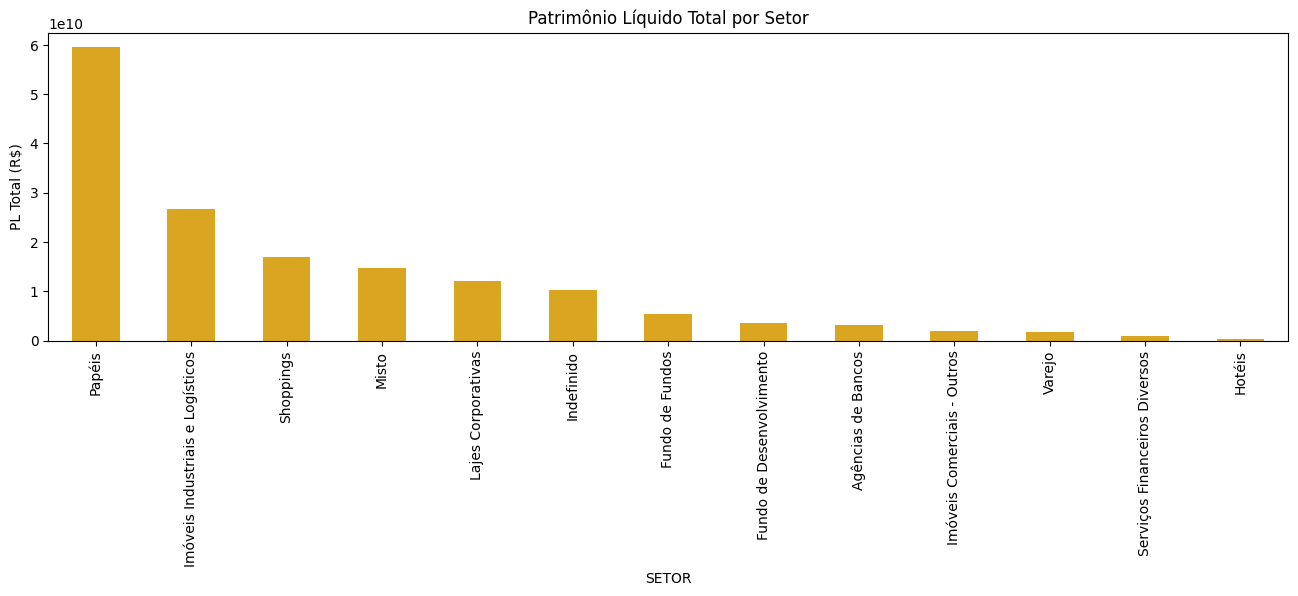

In [51]:
#Agrupar setores por patrimonio liquído
top_setores = df_filtrado.groupby('SETOR')['PATRIMONIO_LIQUIDO'].sum().sort_values(ascending=False)

# Visualizar dados (gráfico de barra vertical)
plt.figure(figsize=(16, 4))
top_setores.plot(kind="bar", color="goldenrod")
plt.title("Patrimônio Líquido Total por Setor")
plt.ylabel("PL Total (R$)")
plt.xticks(rotation=90)
plt.show()

In [74]:
top_setores.head(3)

SETOR
Papéis                              5.950432e+10
Imóveis Industriais e Logísticos    2.662028e+10
Shoppings                           1.698210e+10
Name: PATRIMONIO_LIQUIDO, dtype: float64

In [62]:
#Filtrar dados com os 10 principais setores
maiores_setores = top_setores.head(10).index
filtro_setores = df_filtrado['SETOR'].isin(maiores_setores)
df_filtrado = df_filtrado[filtro_setores]


In [63]:
# Percentual de dados removidos
((len(df_filtrado) / len(df_fiis))-1)*100

-82.04158790170133

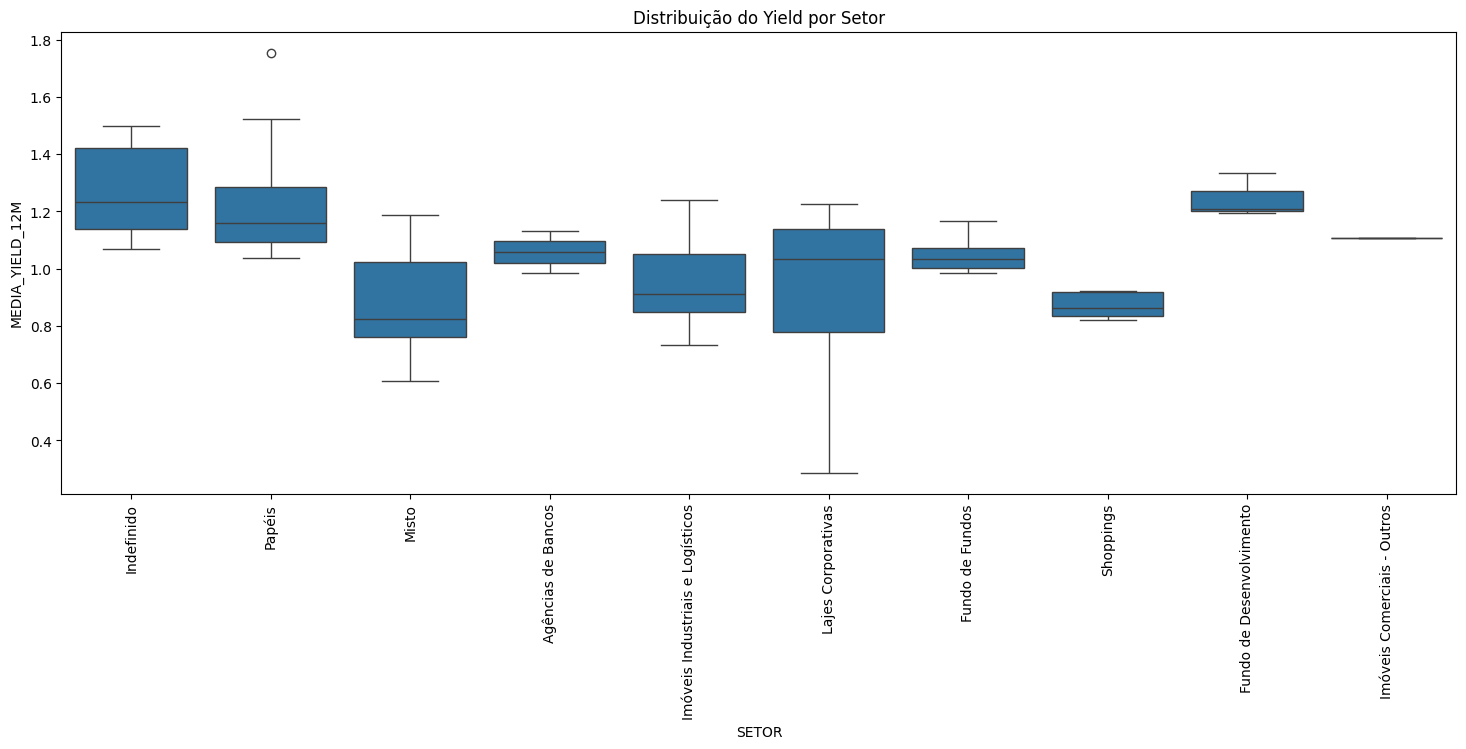

In [64]:
# Análise de YIELD por setor (gráfico boxplot)
plt.figure(figsize=(18, 6))
sns.boxplot(data=df_filtrado, x="SETOR", y="MEDIA_YIELD_12M")
plt.xticks(rotation=90)
plt.title("Distribuição do Yield por Setor")
plt.show()

In [71]:
# Calcular YIELD mediano por setor
median_yield = df_filtrado.groupby('SETOR')['MEDIA_YIELD_12M'].median().sort_values(ascending=False)
median_yield

SETOR
Indefinido                          1.23210
Fundo de Desenvolvimento            1.20920
Papéis                              1.15960
Imóveis Comerciais - Outros         1.10830
Agências de Bancos                  1.05835
Fundo de Fundos                     1.03500
Lajes Corporativas                  1.03250
Imóveis Industriais e Logísticos    0.91250
Shoppings                           0.86420
Misto                               0.82420
Name: MEDIA_YIELD_12M, dtype: float64